In [1]:
import tkinter
import numpy as np 
import pandas as pd
from numpy import exp,log,sin,cos,mean,std
import json
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
import os
def extractGdpKey(dataTmp):
    key=dataTmp['Category'][0]
    if len(key.split())>2:
        key=key.split()[2]
    key=key.split()[0]
    return key
    
def loadGDPFiles(Path):
    dataGdp={}
    for fname in os.listdir(Path):  
        fid=open(Path+fname)
        dataTmp=pd.DataFrame(json.load(fid))[0:-1]
        key=extractGdpKey(dataTmp)
        dataGdp[key]=dataTmp.assign(DateTime=pd.to_datetime(dataTmp.DateTime,infer_datetime_format=True))
        dataGdp[key]=dataGdp[key].set_index('DateTime')
    return dataGdp

def loadGDPFilesCSV(Path):
    dataGdp={}
    for fname in os.listdir(Path):  
        #print(Path+fname)
        dataTmp=pd.read_csv(Path+fname,error_bad_lines=False)
        key=extractGdpKey(dataTmp)
        dataGdp[key]=dataTmp.assign(DateTime=pd.to_datetime(dataTmp.DateTime,infer_datetime_format=True))
        dataGdp[key]=dataGdp[key].set_index('DateTime')
    return dataGdp

def mergeGdpFiles(dataGdp):
    dataGdpMerged= dataGdp['GDP'].drop(
                        columns=['Category','LastUpdate','HistoricalDataSymbol','Frequency','Country']
                        ).rename(columns={'Value':'GDP'})
    dataTmp=dataGdp['capita'].drop(
                        columns=['Category','LastUpdate','HistoricalDataSymbol','Frequency','Country']
                        ).rename(columns={'Value':'GDPpc'})
    dataGdpMerged=dataGdpMerged.merge(dataTmp,left_on='DateTime',right_on='DateTime')
    dataTmp=dataGdp['Prices'].drop(
                        columns=['Category','LastUpdate','HistoricalDataSymbol','Frequency','Country']
                        ).rename(columns={'Value':'GDPpr'})
    dataGdpMerged=dataGdpMerged.merge(dataTmp,left_on='DateTime',right_on='DateTime',how='right')
    dataGdp.pop('GDP')
    dataGdp.pop('capita')
    dataGdp.pop('Prices')
    for key in dataGdp.keys():
         dataTmp=dataGdp[key].drop(
                        columns=['Category','LastUpdate','HistoricalDataSymbol','Frequency','Country']
                        ).rename(columns={'Value':key[0:4]})
         dataGdpMerged=dataGdpMerged.merge(dataTmp,left_on='DateTime',right_on='DateTime')
         #print(key[0:4])
    return dataGdpMerged

dataGdp=loadGDPFiles('DataMexico/')
dataGdpMx=mergeGdpFiles(dataGdp)

dataGdpMxY=dataGdpMx.groupby(pd.Grouper(freq='1Y')).mean()
dataGdpMx.drop(columns=['GDP','GDPpc','GDPpr'],inplace=True)
dataGdpMx=dataGdpMx.assign(Quarter=int(len(dataGdpMx)/4)*[1,2,3,4])


dataGdpNZ=loadGDPFiles('DataNewZealand/')
dataGdpNz=mergeGdpFiles(dataGdpNZ)
dataGdpNzY=dataGdpNz[3:].groupby(pd.Grouper(freq='1Y')).mean()

dataGdpNz=dataGdpNz[3:].drop(columns=['GDP','GDPpc','GDPpr'])
dataGdpNz=dataGdpNz.assign(Quarter=int(len(dataGdpNz)/4)*[1,2,3,4])

dataGdpSW=loadGDPFilesCSV('DataSweden/')
dataGdpSW=mergeGdpFiles(dataGdpSW)
dataGdpSWY=dataGdpSW.groupby(pd.Grouper(freq='1Y')).mean()

dataGdpSW.drop(columns=['GDP','GDPpc','GDPpr'],inplace=True)
dataGdpSW=dataGdpSW.assign(Quarter=int(len(dataGdpSW)/4)*[1,2,3,4])

C:\Users\Andre\AppData\Local\Temp/ipykernel_612/2280095680.py:67: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  dataGdpSW=loadGDPFilesCSV('DataSweden/')
b'Skipping line 166: expected 7 fields, saw 11\n'
b'Skipping line 166: expected 7 fields, saw 11\n'
b'Skipping line 63: expected 7 fields, saw 11\n'


 ## Correlation among sectors Annually/Quaterly  - Mexico

We can remark that the GDP taken annually provides a better overall correlation than quarterly data. We may assert it occurs because of the seansonality of Consumption/Production/Earnings during the different quarters.


**Quarter** 

In [3]:
dataGdpMx.drop(columns='Quarter').corr()

,Agri,Cons,Manu,Mini,Publ,Serv,Tran,Util
Agri,1.000000,0.584219,0.738493,-0.425216,0.817761,0.822824,0.761561,0.725911
Cons,0.584219,1.000000,0.787424,-0.139646,0.688878,0.791441,0.834689,0.811502
Manu,0.738493,0.787424,1.000000,-0.271042,0.805464,0.947096,0.974637,0.901620
Mini,-0.425216,-0.139646,-0.271042,1.000000,-0.623557,-0.458228,-0.335339,-0.402425
Publ,0.817761,0.688878,0.805464,-0.623557,1.000000,0.921098,0.847042,0.882690
Serv,0.822824,0.791441,0.947096,-0.458228,0.921098,1.000000,0.972377,0.968707
Tran,0.761561,0.834689,0.974637,-0.335339,0.847042,0.972377,1.000000,0.933992
Util,0.725911,0.811502,0.901620,-0.402425,0.882690,0.968707,0.933992,1.000000


**Annual** 

In [4]:
dataGdpMxY.corr()

,GDP,GDPpc,GDPpr,Agri,Cons,Manu,Mini,Publ,Serv,Tran,Util
GDP,1.000000,0.906774,0.940066,0.884492,0.900637,0.899644,-0.162251,0.828402,0.924472,0.924004,0.951961
GDPpc,0.906774,1.000000,0.954058,0.889194,0.902900,0.979839,-0.151311,0.789409,0.927215,0.974582,0.894528
GDPpr,0.940066,0.954058,1.000000,0.971938,0.850308,0.973676,-0.387974,0.918552,0.995804,0.989581,0.981033
Agri,0.884492,0.889194,0.971938,1.000000,0.743136,0.932562,-0.513652,0.927259,0.982952,0.946277,0.958060
Cons,0.900637,0.902900,0.850308,0.743136,1.000000,0.806722,-0.151152,0.732024,0.820277,0.854614,0.853014
Manu,0.899644,0.979839,0.973676,0.932562,0.806722,1.000000,-0.284252,0.846579,0.957404,0.980780,0.920612
Mini,-0.162251,-0.151311,-0.387974,-0.513652,-0.151152,-0.284252,1.000000,-0.648157,-0.463213,-0.348377,-0.404957
Publ,0.828402,0.789409,0.918552,0.927259,0.732024,0.846579,-0.648157,1.000000,0.944159,0.884611,0.929352
Serv,0.924472,0.927215,0.995804,0.982952,0.820277,0.957404,-0.463213,0.944159,1.000000,0.979766,0.982344
Tran,0.924004,0.974582,0.989581,0.946277,0.854614,0.980780,-0.348377,0.884611,0.979766,1.000000,0.952937


## GDP Distribution - Mexico
**Quarter** \
We observe that Service follows almost a uniform distribution, reinforced by the line plot which is approximatelly a linear function. In general the others sectors as Manufacturing, Utilities and Transport show some uniformity.

C:\Users\Andre\AppData\Local\Temp/ipykernel_612/4046853353.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  dataGdpMx.drop(columns='Quarter').hist(ax=ax)


array([[<AxesSubplot:title={'center':'Agri'}>,
        <AxesSubplot:title={'center':'Cons'}>,
        <AxesSubplot:title={'center':'Manu'}>],
       [<AxesSubplot:title={'center':'Mini'}>,
        <AxesSubplot:title={'center':'Publ'}>,
        <AxesSubplot:title={'center':'Serv'}>],
       [<AxesSubplot:title={'center':'Tran'}>,
        <AxesSubplot:title={'center':'Util'}>, <AxesSubplot:>]],
      dtype=object)

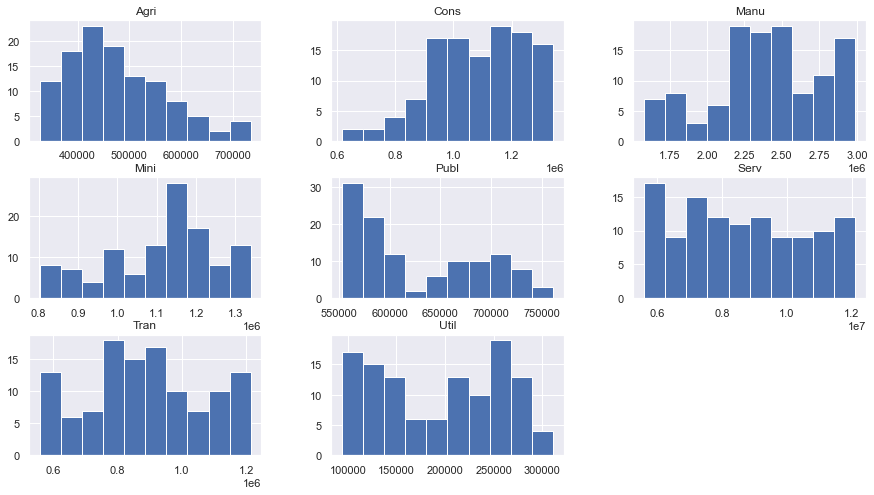

In [5]:
fig,ax=plt.subplots(1)
fig.set_size_inches(15,8)
dataGdpMx.drop(columns='Quarter').hist(ax=ax)

**Annual** \
We observe that in annual data the GDP for all sectors  got closer to the uniformity distribution, even Agriculture which was some kind of Weibull Distribution.

C:\Users\Andre\AppData\Local\Temp/ipykernel_612/3484721496.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  dataGdpMxY.hist(ax=ax)


array([[<AxesSubplot:title={'center':'GDP'}>,
        <AxesSubplot:title={'center':'GDPpc'}>,
        <AxesSubplot:title={'center':'GDPpr'}>],
       [<AxesSubplot:title={'center':'Agri'}>,
        <AxesSubplot:title={'center':'Cons'}>,
        <AxesSubplot:title={'center':'Manu'}>],
       [<AxesSubplot:title={'center':'Mini'}>,
        <AxesSubplot:title={'center':'Publ'}>,
        <AxesSubplot:title={'center':'Serv'}>],
       [<AxesSubplot:title={'center':'Tran'}>,
        <AxesSubplot:title={'center':'Util'}>, <AxesSubplot:>]],
      dtype=object)

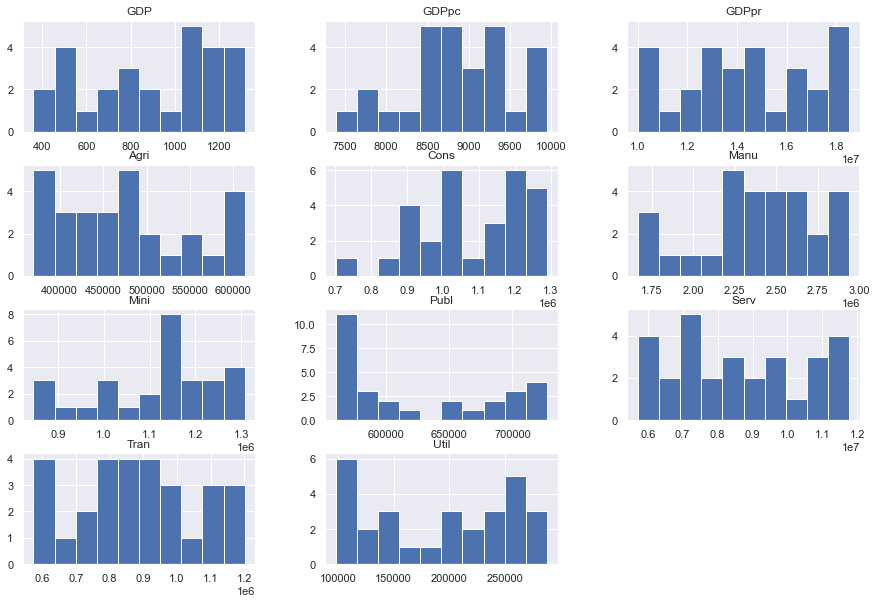

In [6]:
fig,ax=plt.subplots(1)
fig.set_size_inches(15,10)
dataGdpMxY.hist(ax=ax)

C:\Users\Andre\AppData\Local\Temp/ipykernel_612/2918682504.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  dataGdpMxY.drop(columns=['GDP','GDPpc','GDPpr']).hist(ax=ax)


array([[<AxesSubplot:title={'center':'Agri'}>,
        <AxesSubplot:title={'center':'Cons'}>,
        <AxesSubplot:title={'center':'Manu'}>],
       [<AxesSubplot:title={'center':'Mini'}>,
        <AxesSubplot:title={'center':'Publ'}>,
        <AxesSubplot:title={'center':'Serv'}>],
       [<AxesSubplot:title={'center':'Tran'}>,
        <AxesSubplot:title={'center':'Util'}>, <AxesSubplot:>]],
      dtype=object)

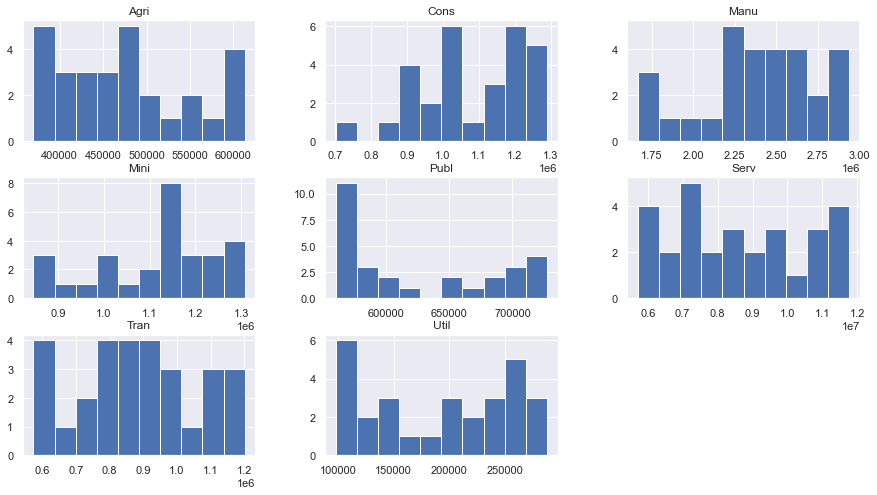

In [7]:
fig,ax=plt.subplots(1)
fig.set_size_inches(15,8)
dataGdpMxY.drop(columns=['GDP','GDPpc','GDPpr']).hist(ax=ax)

##  Time Plot for each Sector - Quarterly Data
We see some drops for some Sectors due to the covid outbreak, specially for Manufactoring

array([[<AxesSubplot:xlabel='DateTime'>, <AxesSubplot:xlabel='DateTime'>,
        <AxesSubplot:xlabel='DateTime'>],
       [<AxesSubplot:xlabel='DateTime'>, <AxesSubplot:xlabel='DateTime'>,
        <AxesSubplot:xlabel='DateTime'>],
       [<AxesSubplot:xlabel='DateTime'>, <AxesSubplot:xlabel='DateTime'>,
        <AxesSubplot:xlabel='DateTime'>]], dtype=object)

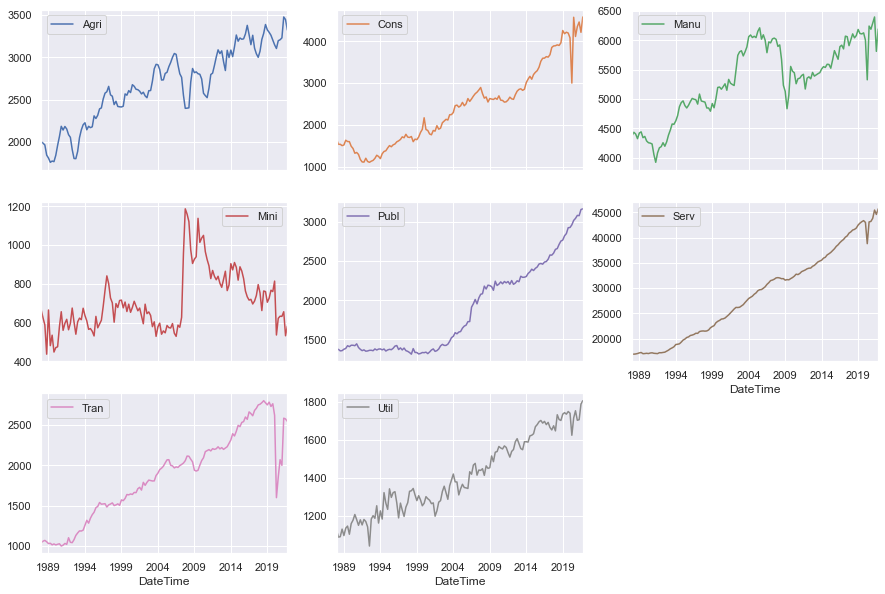

In [8]:
dataGdpNz.drop(columns='Quarter').plot(kind='line',
               subplots=True,
              layout=(3,3),
              figsize=(15,10))

array([[<AxesSubplot:xlabel='DateTime'>, <AxesSubplot:xlabel='DateTime'>,
        <AxesSubplot:xlabel='DateTime'>],
       [<AxesSubplot:xlabel='DateTime'>, <AxesSubplot:xlabel='DateTime'>,
        <AxesSubplot:xlabel='DateTime'>],
       [<AxesSubplot:xlabel='DateTime'>, <AxesSubplot:xlabel='DateTime'>,
        <AxesSubplot:xlabel='DateTime'>],
       [<AxesSubplot:xlabel='DateTime'>, <AxesSubplot:xlabel='DateTime'>,
        <AxesSubplot:xlabel='DateTime'>]], dtype=object)

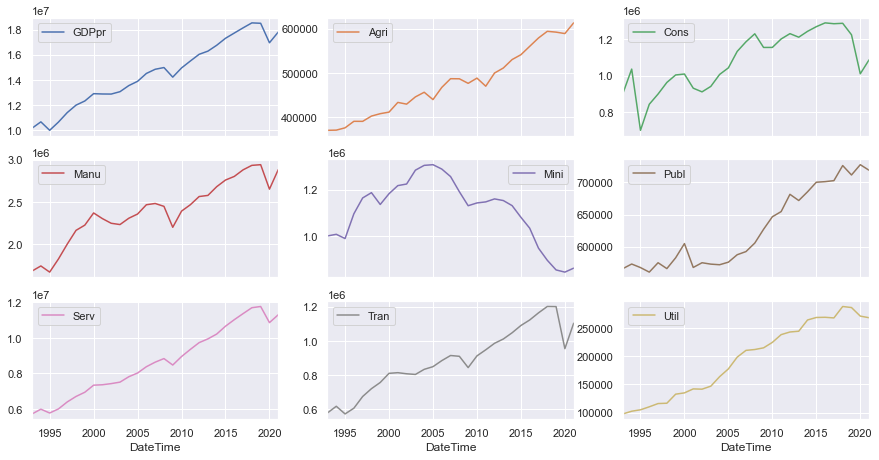

In [9]:
dataGdpMxY.drop(columns=['GDP','GDPpc']).plot(kind='line',
               subplots=True,
              layout=(4,3),
              figsize=(15,10))

# Variance and Box Plot - Mexico, New Zealand and Sweden

As we can remark that the variance for the sectors excluding Service are not expressive. In the other side, Service has a great variability and a major impact in the GDP Total (sum of the sectors). 

Text(0.5, 1.0, 'Sweden Quarterly')

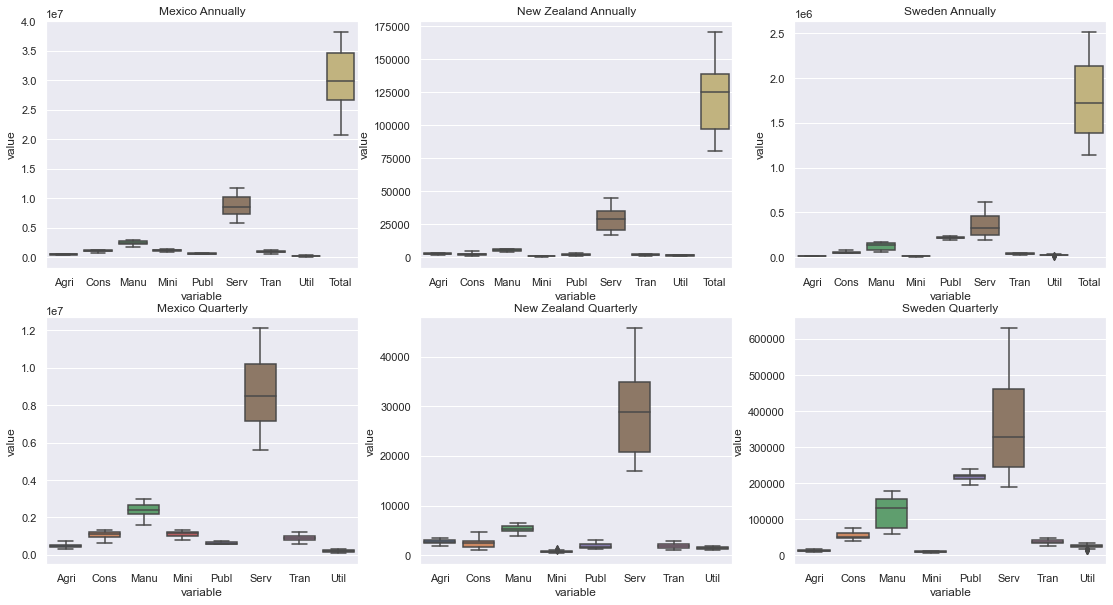

In [10]:
fig,ax=plt.subplots(2,3)
fig.set_size_inches(19,10)
dataMxY=dataGdpMxY.drop(columns=['GDP','GDPpc','GDPpr']).assign(Total=dataGdpMxY.apply(lambda x:x.sum(),axis=1))
dataNzY=dataGdpNzY.drop(columns=['GDP','GDPpc','GDPpr']).assign(Total=dataGdpNzY.apply(lambda x:x.sum(),axis=1))
dataSWY=dataGdpSWY.drop(columns=['GDP','GDPpc','GDPpr']).assign(Total=dataGdpSWY.apply(lambda x:x.sum(),axis=1))

sns.boxplot(x='variable',y='value',data=dataMxY.melt(),ax=ax[0,0])
ax[0,0].set_title("Mexico Annually")
sns.boxplot(x='variable',y='value',data=dataGdpMx.drop(columns='Quarter').melt(),ax=ax[1,0])
ax[1,0].set_title("Mexico Quarterly")

sns.boxplot(x='variable',y='value',data=dataNzY.melt(),ax=ax[0,1])
ax[0,1].set_title("New Zealand Annually")
sns.boxplot(x='variable',y='value',data=dataGdpNz.drop(columns='Quarter').melt(),ax=ax[1,1])
ax[1,1].set_title("New Zealand Quarterly")

sns.boxplot(x='variable',y='value',data=dataSWY.melt(),ax=ax[0,2])
ax[0,2].set_title("Sweden Annually")

sns.boxplot(x='variable',y='value',data=dataGdpSW.drop(columns='Quarter').melt(),ax=ax[1,2])
ax[1,2].set_title("Sweden Quarterly")

# Variance and Box Plot - Mexico, New Zealand and Sweden
Once we concatenate the data of the 3 countries normalizing its values to the sum of its Sectors. We see the same behavior, the variance does not change largely for the most part os sectors, only for Public Admininstration GDP it increased due to Sweeden data which has a greater role in its GDP value. 


We could see on the previous plots that Puclic data of Sweeden was close to the 1st quantile values of the Service. We can infer that the participation of the different sectors in the overall GDP is similar among the 3 countries,exept for Public and Service Sectors. 

Text(0.5, 1.0, '3 Countries Quarterly')

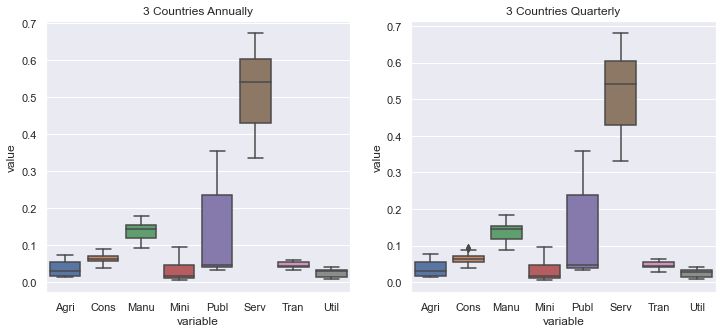

In [11]:

data3Y=pd.concat([dataGdpMxY,dataGdpNzY,dataGdpSWY]
                ).drop(columns=['GDP','GDPpc','GDPpr']
                ).apply(lambda x:x/(x.sum()),axis=1)


data3=pd.concat([dataGdpMx,dataGdpNz,dataGdpSW]
               ).drop(columns='Quarter').apply(lambda x:x/(x.sum()),axis=1)

fig,ax=plt.subplots(1,2)
fig.set_size_inches(12,5)

sns.boxplot(x='variable',y='value',data=data3Y.melt(),ax=ax[0])
ax[0].set_title("3 Countries Annually")
sns.boxplot(x='variable',y='value',data=data3.melt(),ax=ax[1])
ax[1].set_title("3 Countries Quarterly")



## Assumptions
Taking into account the Service sector  provides support for all other the sectors, we may assert that Service is highly affected by the other sectors, being supported by its strong correlation. Thus, some small variations on the other sectors may engender a meanigful impact on services, consequently on the overall GDP. Following this assumption, we will try to fit Service GDP for all countries using the other sectors in order to make predictions of possible scenarios.

array([[<AxesSubplot:xlabel='DateTime'>, <AxesSubplot:xlabel='DateTime'>,
        <AxesSubplot:xlabel='DateTime'>],
       [<AxesSubplot:xlabel='DateTime'>, <AxesSubplot:xlabel='DateTime'>,
        <AxesSubplot:xlabel='DateTime'>],
       [<AxesSubplot:xlabel='DateTime'>, <AxesSubplot:xlabel='DateTime'>,
        <AxesSubplot:xlabel='DateTime'>]], dtype=object)

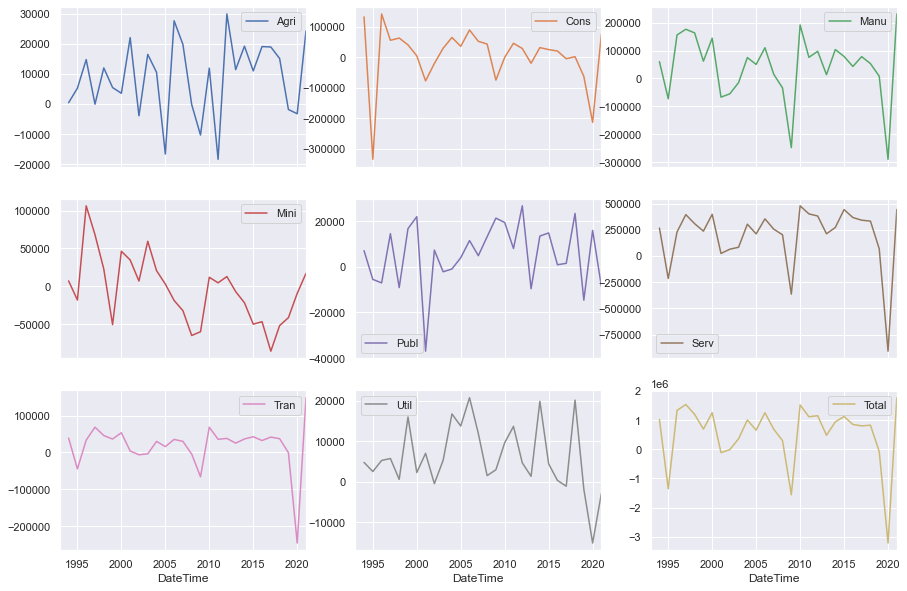

In [12]:
dataGdpMxY.assign(Total=dataGdpMxY.apply(
                            lambda x:x.sum(),axis=1)).drop(
                            columns=['GDP','GDPpc','GDPpr']).apply(
                            lambda x:x.diff()).plot(
                            kind='line',
                            subplots=True,
                            layout=(3,3),
                            figsize=(15,10))

C:\Users\Andre\AppData\Local\Temp/ipykernel_612/1871586646.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  dataGdpMxY.assign(Total=dataGdpMxY.apply(


array([[<AxesSubplot:title={'center':'Agri'}>,
        <AxesSubplot:title={'center':'Cons'}>,
        <AxesSubplot:title={'center':'Manu'}>],
       [<AxesSubplot:title={'center':'Mini'}>,
        <AxesSubplot:title={'center':'Publ'}>,
        <AxesSubplot:title={'center':'Serv'}>],
       [<AxesSubplot:title={'center':'Tran'}>,
        <AxesSubplot:title={'center':'Util'}>,
        <AxesSubplot:title={'center':'Total'}>]], dtype=object)

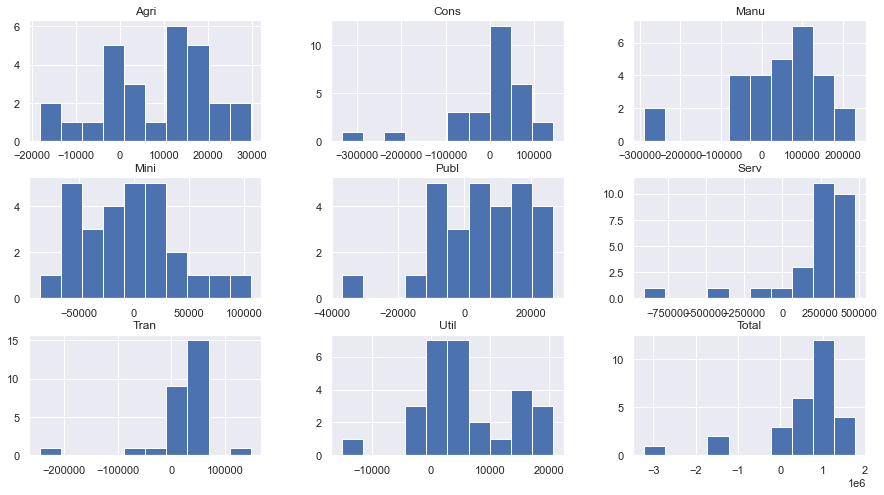

In [13]:
fig,ax=plt.subplots(1)
fig.set_size_inches(15,8)
dataGdpMxY.assign(Total=dataGdpMxY.apply(
                            lambda x:x.sum(),axis=1)).drop(
                            columns=['GDP','GDPpc','GDPpr']).apply(
                            lambda x:x.diff()).hist(ax=ax)

In [18]:
dataGdpNzY.drop(columns=['GDP','GDPpc','GDPpr']).apply(lambda x:x.diff()).corr()


,Agri,Cons,Manu,Mini,Publ,Serv,Tran,Util
Agri,1.000000,0.152072,-0.067881,-0.268580,-0.198642,0.113109,0.175703,0.146100
Cons,0.152072,1.000000,0.605542,-0.029052,0.303001,0.871531,0.582007,0.245778
Manu,-0.067881,0.605542,1.000000,-0.120427,-0.074674,0.632711,0.522005,0.080488
Mini,-0.268580,-0.029052,-0.120427,1.000000,0.242716,-0.023746,0.125507,-0.174662
Publ,-0.198642,0.303001,-0.074674,0.242716,1.000000,0.300041,-0.154177,0.149112
Serv,0.113109,0.871531,0.632711,-0.023746,0.300041,1.000000,0.750972,0.154633
Tran,0.175703,0.582007,0.522005,0.125507,-0.154177,0.750972,1.000000,0.238008
Util,0.146100,0.245778,0.080488,-0.174662,0.149112,0.154633,0.238008,1.000000


In [15]:
import pandas as pd
from scipy.linalg import eigvals
sns.set_theme(style='ticks')
#sns.pairplot(dataGdpMxY.drop(columns=['GDP','GDPpc','GDPpr']).apply(lambda x:x.diff()).cov())


In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

dataGdpMxYdiff=dataGdpMxY.assign(Total=dataGdpMxY.apply(lambda x:x.sum(),axis=1))
dataGdpMxYdiff=dataGdpMxYdiff.apply(lambda x:x.diff())[1:-1]
X=dataGdpMxYdiff.drop(columns=['GDP','GDPpc','GDPpr','Total']).values
#X=StandardScaler().fit(X).transform(X)
Y=dataGdpMxYdiff['Total'].values
Xs=dataGdpMxYdiff.drop(columns=['GDP','GDPpc','GDPpr','Total','Serv','Publ','Util'])
Xs=StandardScaler().fit(Xs).transform(Xs)
Ys=dataGdpMxYdiff['Serv']
Ys=Ys/np.max(Ys)

regr=LinearRegression()
regrs=LinearRegression()
regrs.fit(Xs,Ys)
regr.fit(X,Y)
Y_hat=regr.predict(X)
Ys_hat=regrs.predict(Xs)

print("Error % Serv Fit",np.max(100*abs(Ys_hat-Ys)/Ys))
print("Coeff Fit",regrs.coef_)
print("Error % Total Fit",np.max(100*abs(Y_hat-Y)/Y))
print("Coeff Fit",regr.coef_)

Error % Serv Fit 88.10983090489377
Coeff Fit [ 0.00443429  0.06885847  0.19310376 -0.07856543  0.37091235]
Error % Total Fit 7.729655617942933
Coeff Fit [1.72472492 2.08924134 2.02373052 1.76360436 0.39201555 1.94706622
 1.56931798 2.44545305]


array([[<AxesSubplot:xlabel='DateTime'>, <AxesSubplot:xlabel='DateTime'>,
        <AxesSubplot:xlabel='DateTime'>],
       [<AxesSubplot:xlabel='DateTime'>, <AxesSubplot:xlabel='DateTime'>,
        <AxesSubplot:xlabel='DateTime'>],
       [<AxesSubplot:xlabel='DateTime'>, <AxesSubplot:xlabel='DateTime'>,
        <AxesSubplot:xlabel='DateTime'>],
       [<AxesSubplot:xlabel='DateTime'>, <AxesSubplot:xlabel='DateTime'>,
        <AxesSubplot:xlabel='DateTime'>]], dtype=object)

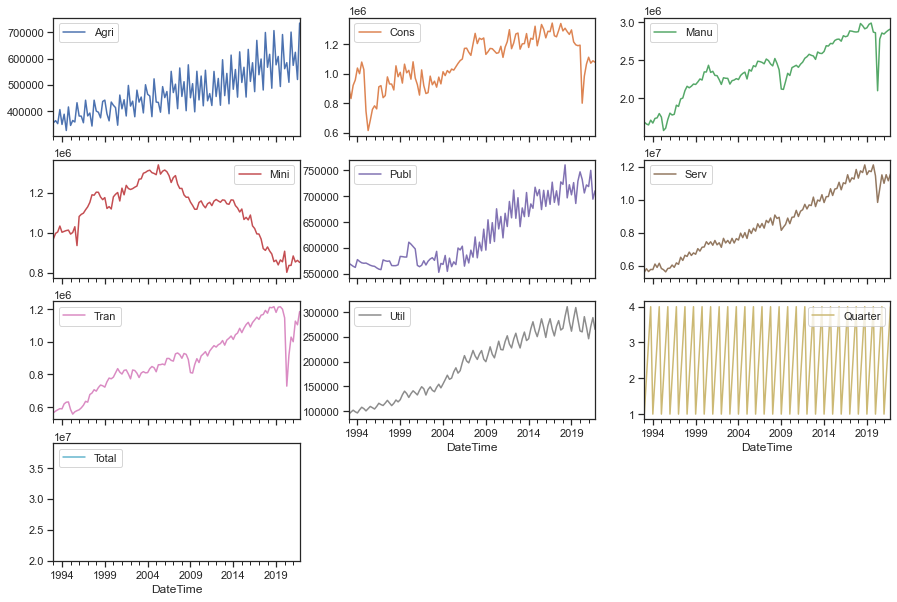

In [25]:
dataGdpMx.assign(Total=dataGdpMxY.apply(
                            lambda x:x.sum(),axis=1)).apply(
                            lambda x:x).plot(
                            kind='line',
                            subplots=True,
                            layout=(4,3),
                            figsize=(15,10))

In [31]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import acf

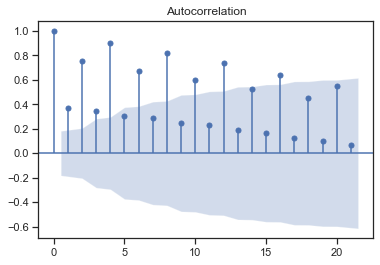

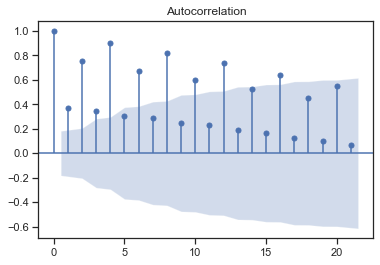

In [36]:
plot_acf(dataGdpMx['Agri'])
